# 소규모 데이터셋으로 심층신경망 학습하기  1탄

4000개의 강아지와 고양이 사진으로 구성된 데이터셋으로 강아지/고양이 분류기를 만들어 보자.  

1) 사전에 학습된 모델을 사용하지 않고 기본 구조로 학습한 모델은 정확도 71%를 달성하였고,  
2) 데이터 증식을 통해 82%까지 올릴 수 있다.

# Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as osp

## 강아지 vs 고양이 캐글 경연대회 데이터셋
2.5만 개의 강아지, 고양이 이미지를 가진 데이터셋으로 각 클래스마다 1.25만개의 이미지를 포함  
클래스 당 훈련 셋 1000개, 검증 셋 500개, 테스트 셋 500개를 추출하여 훈련을 진행.  

In [5]:
# zip 파일 압축 풀기
import zipfile

original_base_dir = '/Transfer Learning/datasets'
os.mkdir(original_base_dir)
dataset_zip = zipfile.ZipFile('/Transfer Learning/dogs-vs-cats/test1.zip')
dataset_zip.extractall(original_base_dir)
dataset_zip.close()

dataset_zip = zipfile.ZipFile('/Transfer Learning/dogs-vs-cats/train.zip')
dataset_zip.extractall(original_base_dir)
dataset_zip.close()

강아지/고양이 각각 1000개의 훈련, 500개의 검증, 500개의 테스트 세트로 데이터 분할.  

In [6]:
# 폴더 생성
import os, shutil

original_dataset_dir = '/Transfer Learning/datasets/train'
base_dir = '/Transfer Learning/datasets_small'
os.mkdir(base_dir)

train_dir = osp.join(base_dir, 'train')
os.mkdir(train_dir)
val_dir = osp.join(base_dir, 'val')
os.mkdir(val_dir)
test_dir = osp.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = osp.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = osp.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

val_cats_dir = osp.join(val_dir, 'cats')
os.mkdir(val_cats_dir)
val_dogs_dir = osp.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

test_cats_dir = osp.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = osp.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [7]:
# 고양이
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = osp.join(original_dataset_dir, fname)
    dst = osp.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = osp.join(original_dataset_dir, fname)
    dst = osp.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = osp.join(original_dataset_dir, fname)
    dst = osp.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
# 강아지
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for idx, fname in enumerate(fnames) :
  src = osp.join(original_dataset_dir, f'dog.{idx}.jpg')
  dst = osp.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
  src = osp.join(original_dataset_dir, fname)
  dst = osp.join(val_dogs_dir, fname)
  shutil.copyfile(src, dst)
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
  src = osp.join(original_dataset_dir, fname)
  dst = osp.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [9]:
# 분할된 데이터의 수 출력
print("고양이 데이터셋")
print("train :", len(os.listdir(train_cats_dir)))
print("test :", len(os.listdir(test_cats_dir)))
print("val :", len(os.listdir(val_cats_dir)))
print()
print("강아지 데이터셋")
print("train :", len(os.listdir(train_dogs_dir)))
print("test :", len(os.listdir(test_dogs_dir)))
print("val :", len(os.listdir(val_dogs_dir)))

고양이 데이터셋
train : 1000
test : 500
val : 500

강아지 데이터셋
train : 1000
test : 500
val : 500


# 1) 네트워크 구축하기
(Conv2D + Maxpooling2D)3 + Conv2D + Dense2 입력크기 : 150X150

In [12]:
import tensorflow 
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [15]:
# 모델의 훈련 설정
from tensorflow.keras import optimizers

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 데이터 전처리

1. 사진 파일 읽기  
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩  
3. 부동 소수 타입의 텐서로 변환  
4. 픽셀 값 (0~255)의 스케일을 [0,1]로 조정 

keras.preprocessing.image 라이브러리 사용  
- ImageDataGenerator 클래스: 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 generator을 만들어줌

In [17]:
# ImageDataGenerator를 사용해서 디렉토리에서 이미지 읽기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # 타겟 디렉토리
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


150X150 이미지 x20개(batch_size) = 하나의 미니배치 -> 크기: (20,150,150,3)  
이진 레이블 배치 -> 크기: (20,)

In [19]:
# generator가 생성하는 훈련 데이터와 레이블의 미니배치 크기 확인하기
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


### fig_generator

```python 
fit_generator(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=None, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)
```  

- generator: 입력과 타겟의 배치를 끝없이 반환하는 파이썬 제너레이터를 첫번째 변수로 입력  
- steps_per_epoch:  
    - 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 지정  
    - steps_per_epoch 갯수만큼 generator로부터 미니배치를 뽑은 다음 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행한 후 다음 에포크로 넘어감  
    - 여기서는 20개의 샘플이 하나의 미니 배치이고 전체 2000개의 샘플이 있으므로 steps_per_epoch를 100으로 지정  
- validation_data:  
    - 데이터 제너레이터 혹은 넘파이 배열의 튜플  
    - 데이터 제너레이터를 사용하는 경우 검증 데이터의 배치를 끝없이 반환하므로 얼마나 많은 배치를 추출하여 평가할지 validation_steps 변수에 지정  

</br>  
</br>  
<hr>

> Q. 기존에는 `fit(x,y,batch_size,epoch)`만을 지정해주었다. 즉, generator를 사용하지 않았는데 이번에 사용하는 이유는 무엇인가?  

A. 데이터 전체를 로딩해줄 필요 없이 그때 그때 필요한 배치 사이즈 만큼의 데이터만 불러들이기 위해서 generator를 사용한다.  

</br>

> Q. steps_per_epoch/epoch이 헷갈린다.  

A. 기존에는 ImageDataGenerator 없이 전체 훈련데이터를 메모리에 올려놓고 배치 사이즈만 지정해서 끌어왔었다. 전체 훈련 데이터의 샘플 수를 알기 때문에 한 epoch당 미니 배치를 몇번 추출해야하는지 알 수 있었다.  
예를 들어 MNIST 데이터셋은 훈련 데이터가 6000개 있고 배치 사이즈를 64개로 지정할 경우 6000//64개를 한 epoch으로 정의하면 되었다.  

그런데 전체 훈련 데이터가 너무 클 경우에는 ImageDataGenrator를 사용해야한다. ImageDataGenerator는 지정한 크기의 미니 배치를 끝없이/랜덤으로 반환한다. 따라서 한 epoch를 몇 번의 미니배치로 정의할 것인가가 중요하고 이를 steps_per_epoch라는 변수에 지정해준다.  
Cats&Dogs 예제와 같이 (전체 데이터셋 샘플 수/미니 배치 수)로 계산하는 것이 일반적인 것 같다.  

[iteration/epoch/batch_size 개념 설명](https://losskatsu.github.io/machine-learning/epoch-batch/#2-batch-size%EC%9D%98-%EC%9D%98%EB%AF%B8)




In [20]:
# 배치 제너레이터를 사용하여 모델 훈련하기
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=30, 
    validation_data=val_generator,
    validation_steps=50
)

/Users/hanhyeongu/miniforge3/envs/hg/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-19 12:01:06.522048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-19 12:01:06.523317: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30


2022-12-19 12:01:06.841106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 99/100 [============================>.] - ETA: 0s - loss: 0.6887 - accuracy: 0.5485

2022-12-19 12:01:11.004690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 6s 45ms/step - loss: 0.6886 - accuracy: 0.5495 - val_loss: 0.6715 - val_accuracy: 0.6210
Epoch 2/30
100/100 [==============================] - 4s 41ms/step - loss: 0.6578 - accuracy: 0.5985 - val_loss: 0.6394 - val_accuracy: 0.6290
Epoch 3/30
100/100 [==============================] - 4s 41ms/step - loss: 0.6067 - accuracy: 0.6770 - val_loss: 0.6013 - val_accuracy: 0.6710
Epoch 4/30
100/100 [==============================] - 4s 41ms/step - loss: 0.5613 - accuracy: 0.6970 - val_loss: 0.7773 - val_accuracy: 0.5900
Epoch 5/30
100/100 [==============================] - 4s 42ms/step - loss: 0.5414 - accuracy: 0.7195 - val_loss: 0.6011 - val_accuracy: 0.6660
Epoch 6/30
100/100 [==============================] - 4s 41ms/step - loss: 0.5050 - accuracy: 0.7465 - val_loss: 0.5630 - val_accuracy: 0.7030
Epoch 7/30
100/100 [==============================] - 4s 41ms/step - loss: 0.4866 - accuracy: 0.7560 - val_loss: 0.5615 - val_accuracy: 0.6920
Epoch 8/30

In [21]:
# 모델 저장하기
model.save('./cats_and_dogs_small_1.h5')

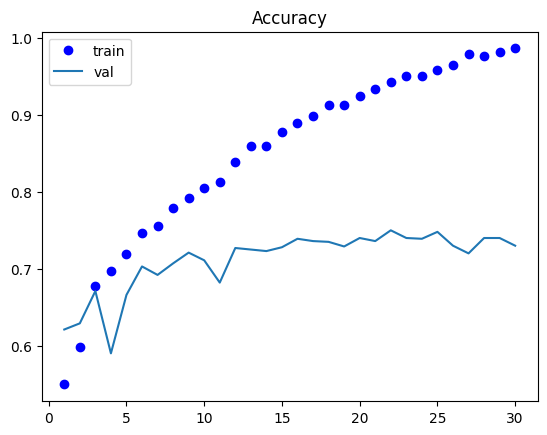

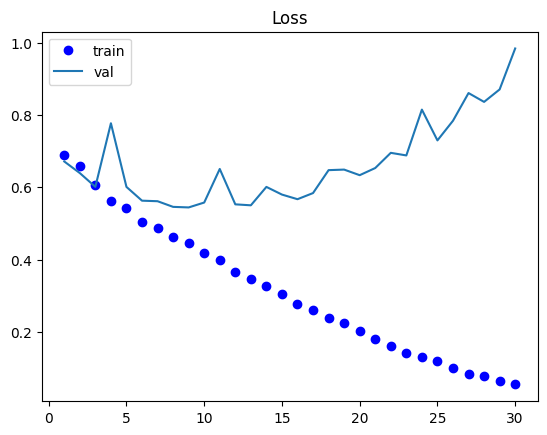

In [22]:
# 훈련의 정확도와 손실 그래프 그리기
def history_plot(history_dict):
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = np.arange(1, len(acc)+1)
    plt.plot(epochs, acc, 'bo', label='train')
    plt.plot(epochs, val_acc, label='val')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='train')
    plt.plot(epochs, val_loss, label='val')
    plt.title('Loss')
    plt.legend()
    plt.show()

history_plot(history.history)

### 해석  
- 과대적합  
- 검증 정확도 79~72%에서 멈춤

# 2) 데이터 증식 사용하기 
기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하여 과대적합을 막을 수 있다.  
ImageDataGenertor가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하도록 설정 가능  

### ImageDataGenerator
```python
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)
```


In [23]:
# ImageDataGenerator를 사용하여 데이터 증식 설정
datagen = ImageDataGenerator(
    rotation_range=20, # 이미지 회전 각도 범위
    width_shift_range=0.1, # 수평 방향으로 평행 이동 (전체 너비에 대한 비율)
    height_shift_range=0.1, # 수직 방향으로 평행 이동 (전체 높이에 대한 비율)
    shear_range=0.1, # 전단(shearing transformation) 각도 범위
    zoom_range= 0.1, # 이미지 확대 범위
    horizontal_flip=True, # 수평으로 뒤집기
    fill_mode='nearest' # 회전/가로*세로 이동에 의해 새롭게 생성해야할 픽셀을 채울 전략
)

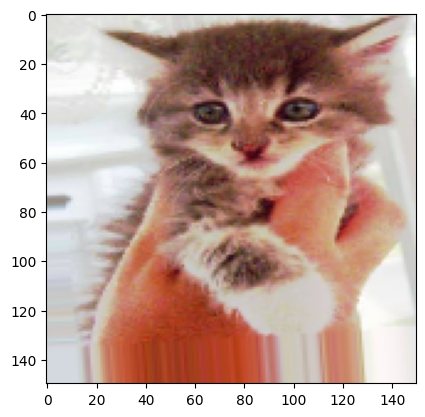

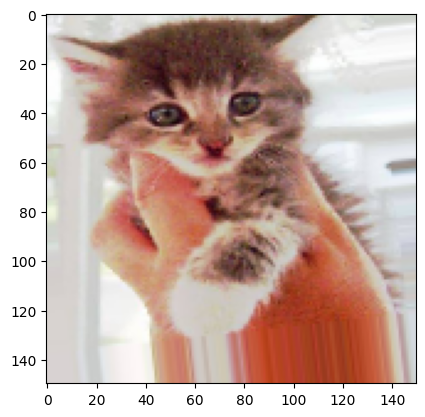

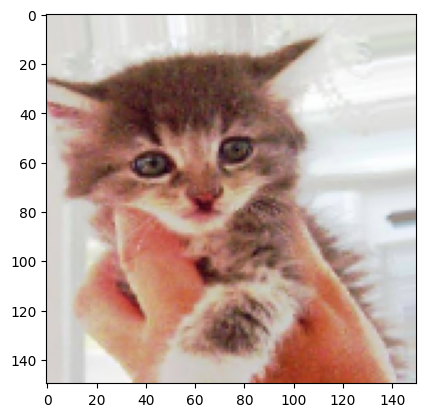

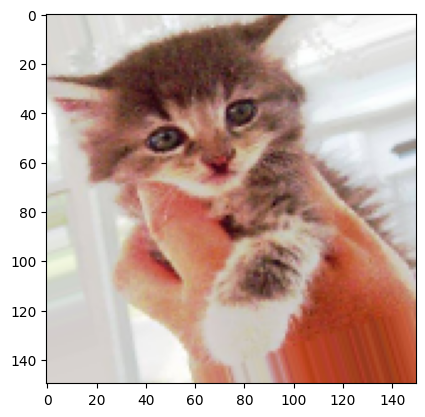

In [24]:
# 랜덤하게 증식된 훈련 이미지 그리기
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3] # 증식할 이미지 선택

img = image.load_img(img_path, target_size=(150,150)) # 이미지 읽고 크기 변경
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape) # (1,150,150,3)으로 변경

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break

plt.show()

데이터 증폭을 하더라도 동일한 이미지이므로 이미지 사이의 상호연관성을 무시할 수 없다.  
따라서 과대적합을 제거하기에는 충분하지 않을 수 있기 때무네 FC layer 직전에 Dropout 층을 추가한다.

In [25]:
# 드롭아웃을 포함한 새로운 네트워크 정의하기
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=optimizers.RMSprop(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [26]:
# 데이터 증식 제너레이터를 사용하여 네트워크 훈련하기
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255) # 검증 데이터는 증식되어서는 안됨


train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150,150),
    batch_size=16,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='binary'
)


history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=val_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/Users/hanhyeongu/miniforge3/envs/hg/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-19 12:20:32.107671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.5150

2022-12-19 12:20:38.079359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 7s 68ms/step - loss: 0.6938 - accuracy: 0.5150 - val_loss: 0.6834 - val_accuracy: 0.5125
Epoch 2/100
100/100 [==============================] - 7s 65ms/step - loss: 0.6838 - accuracy: 0.5500 - val_loss: 0.7079 - val_accuracy: 0.5225
Epoch 3/100
100/100 [==============================] - 6s 64ms/step - loss: 0.6783 - accuracy: 0.5825 - val_loss: 0.6658 - val_accuracy: 0.5687
Epoch 4/100
100/100 [==============================] - 6s 64ms/step - loss: 0.6691 - accuracy: 0.5719 - val_loss: 0.6634 - val_accuracy: 0.5863
Epoch 5/100
100/100 [==============================] - 6s 65ms/step - loss: 0.6590 - accuracy: 0.5962 - val_loss: 0.6279 - val_accuracy: 0.6675
Epoch 6/100
100/100 [==============================] - 6s 63ms/step - loss: 0.6375 - accuracy: 0.6156 - val_loss: 0.6237 - val_accuracy: 0.6287
Epoch 7/100
100/100 [==============================] - 6s 63ms/step - loss: 0.6269 - accuracy: 0.6381 - val_loss: 0.5968 - val_accuracy: 0.6787
Epoc

In [27]:
model.save('./cats_and_dogs_small_2.h5')

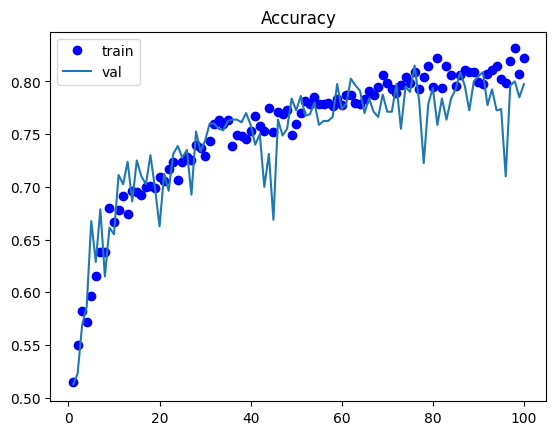

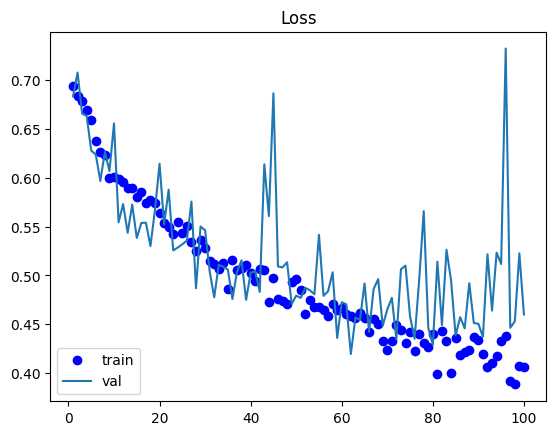

In [28]:
def history_plot(history_dict):
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = np.arange(1, len(acc)+1)
  plt.plot(epochs, acc, 'bo', label='train')
  plt.plot(epochs, val_acc, label='val')
  plt.title('Accuracy')
  plt.legend()
  plt.show()

  plt.plot(epochs, loss, 'bo', label='train')
  plt.plot(epochs, val_loss, label='val')
  plt.title('Loss')
  plt.legend()
  plt.show()

history_plot(history.history)

In [29]:
history_dict = history.history
print("final train accuracy : {:.4f}".format(history_dict['accuracy'][-1]))
print("final val accuracy : {:.4f}".format(history_dict['val_accuracy'][-1]))

final train accuracy : 0.8219
final val accuracy : 0.7975


# 마무리
정확도가 70%인 기본 구조에서 데이터 증폭을 통해 80%까지 끌어올렸다.